# Workshop4: Data pipeline Orchestration  
วัตถุประสงค์ ต้องการใช้งานAirflow ผ่านทางGCP --> Cloud composer โดยอ้างอิงจากคอร์ส [Road to engineer ของ Datath](https://school.datath.com/courses/road-to-data-engineer-2-0-2023) และความรู้อื่นๆ

Reference :[Data Engineer มือใหม่ เริ่มจัดการข้อมูลกว่าล้านแถวกันยังไง ?](https://medium.com/road-to-data-engineer-student-blogs/%E0%B9%80%E0%B8%A1%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B3%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%A1%E0%B8%B2%E0%B8%81%E0%B8%81%E0%B8%A7%E0%B9%88%E0%B8%B2%E0%B8%A5%E0%B9%89%E0%B8%B2%E0%B8%99%E0%B9%81%E0%B8%96%E0%B8%A7-data-engineer-%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B8%A1%E0%B8%B2%E0%B8%8A%E0%B9%88%E0%B8%A7%E0%B8%A2%E0%B9%84%E0%B8%94%E0%B9%89%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B9%84%E0%B8%87%E0%B8%9A%E0%B9%89%E0%B8%B2%E0%B8%87-85f4cde72516)

## เตรียมความพร้อมให้กับข้อมูล

In [ ]:
#เชื่อมต่อ Google colab กับ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pandas read CSV in Google drive
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/R2DE-Workshop2/Audible_Dataset_final.csv")
type(df1)

pandas.core.frame.DataFrame

In [ ]:
# show all column name
for col in df1.columns:
    print(col)

In [ ]:
# Remove all columns between column name 'Review 1' to 'Review100'
df1 = df1.drop(df1.loc[:, 'Review 1':'Review100'].columns, axis=1)

In [ ]:
df1

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95
2,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,NaN,NaN,$41.99
3,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,NaN,NaN,$29.65
4,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65
...,...,...,...,...,...,...,...,...,...,...
2264,Kama Sutra,Become a Master of the Art of Love Making. Tan...,Eva Becker,ChasMandala,3 hrs and 29 mins,Unabridged Audiobook,Erotica,5,203.0,$14.95
2265,Meditación Práctica para Principiantes [Prac...,Una guía para principiantes para aliviar la an...,Taylor Knox,William Ditilio,3 hrs and 14 mins,Unabridged Audiobook,Health & Wellness,5,203.0,$14.95
2266,Forgotten,"The Untold Story of D-day's Black Heroes, at H...",Linda Hervieux,Ron Butler,9 hrs and 33 mins,Unabridged Audiobook,History,4.6,70.0,$24.95
2267,The Missing,NaN,Daisy Pearce,Karen Cass,10 hrs and 18 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.2,141.0,$30.09


In [ ]:
# Create Book_id
import numpy as np

Book_id = np.arange(1, len(df1) + 1)
Book_id

array([   1,    2,    3, ..., 2267, 2268, 2269])

In [ ]:
# ADD column Book_id
df1['Book_id'] = Book_id
df1.head()

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,Book_id
0,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65,1
1,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95,2
2,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,NaN,NaN,$41.99,3
3,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,NaN,NaN,$29.65,4
4,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65,5


In [ ]:
# Set Book_id as INDEX

df1 = df1.set_index("Book_id")


In [ ]:
df1

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
Book_id,,,,,,,,,,
1,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65
2,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95
3,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,NaN,NaN,$41.99
4,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,NaN,NaN,$29.65
5,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65
...,...,...,...,...,...,...,...,...,...,...
2265,Kama Sutra,Become a Master of the Art of Love Making. Tan...,Eva Becker,ChasMandala,3 hrs and 29 mins,Unabridged Audiobook,Erotica,5,203.0,$14.95
2266,Meditación Práctica para Principiantes [Prac...,Una guía para principiantes para aliviar la an...,Taylor Knox,William Ditilio,3 hrs and 14 mins,Unabridged Audiobook,Health & Wellness,5,203.0,$14.95
2267,Forgotten,"The Untold Story of D-day's Black Heroes, at H...",Linda Hervieux,Ron Butler,9 hrs and 33 mins,Unabridged Audiobook,History,4.6,70.0,$24.95


In [ ]:
# Save "to csv" file

df1.to_csv("audible_data.csv")

ต่อมาจะใช้ file ใน WS2 "Cleaned_data" เปลี่ยนชื่อเป็น "audible_transaction"

-------------------------------------------------------------------------------------------

## เรามาตั้งค่า K8s กับ composer กันก่อน  
[ตามลิ้งค์Building Batch Data Pipelines on Google Cloud |Data Engineer](https://www.youtube.com/watch?v=HGSb46RNM3A)

> ในส่วนการสร้างEnvironment บางคนจะเกิดError แบบผม ถ้าทำตามลิ้งค์จะไม่Error :)

อย่าลืม ติดตั้ง Python Package บน Airflow
1. pymysql — ใช้ในการต่อกับ Database
2. requests — ใช้เพื่อดึงข้อมูลจาก API
3. pandas — ใช้ในการ Transform ข้อมูล  
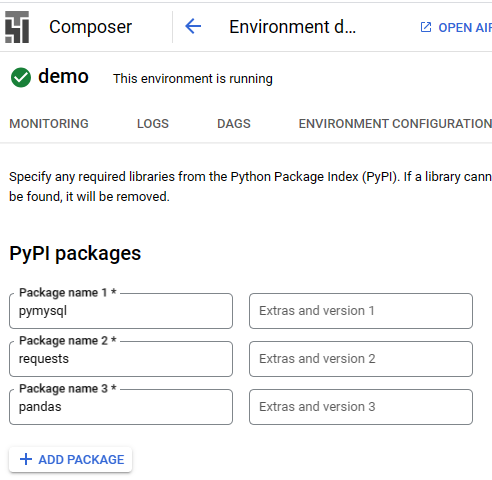

## Exercise 1


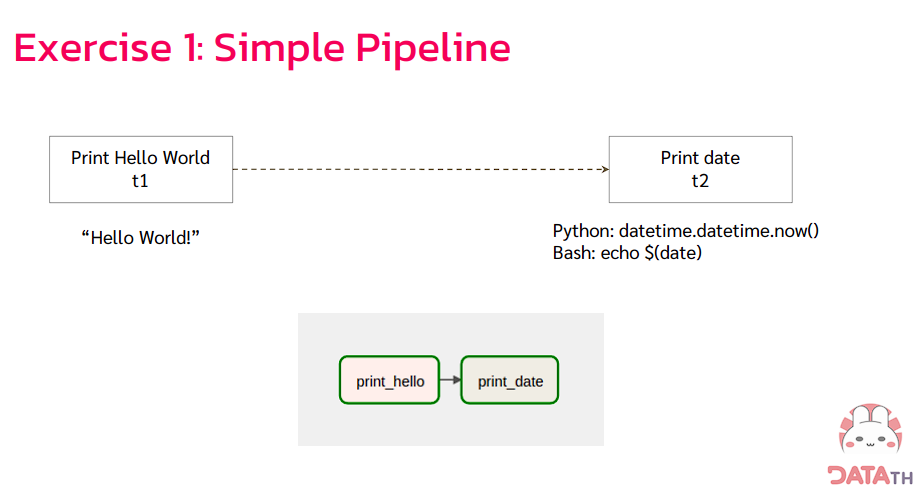

### Option 1

In [ ]:
import datetime

from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}


def my_function(something: str):
    print(something)


with DAG(
    "exercise1_simple_dag",
    start_date=days_ago(1), #เริ่มเมื่อวาน แปลว่าทำงานได้เลย
    schedule_interval=None,
    tags=["exercise"]
) as dag:

    # Exercise1: Simple Pipeline - Hello World Airflow!
    # ใน exercise นี้จะได้รู้จักกับ PythonOperator (และ BashOperator)
    # และลองเขียน task dependencies

    t1 = PythonOperator(
        task_id="print_hello",
        python_callable=my_function,
        op_kwargs={"something": "Hello World!"},
        #op_kwargs option keyword argument my_function(something: str). someting = "Hello World!"
        )

    t2 = BashOperator(
        task_id="print_date",
        bash_command="date",
    )

    #TODO: ใส่ task dependencies
    t1 >> t2


#### Output  
- t1 แสดง "Hello world"
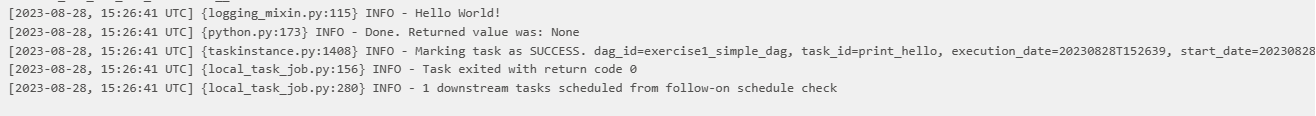
- t2 ให้คำสั่ง Bash command `date`  
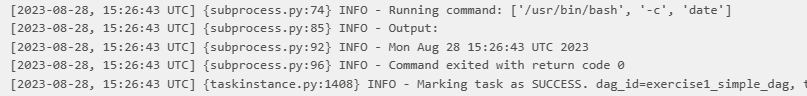

#### Task dependencies  
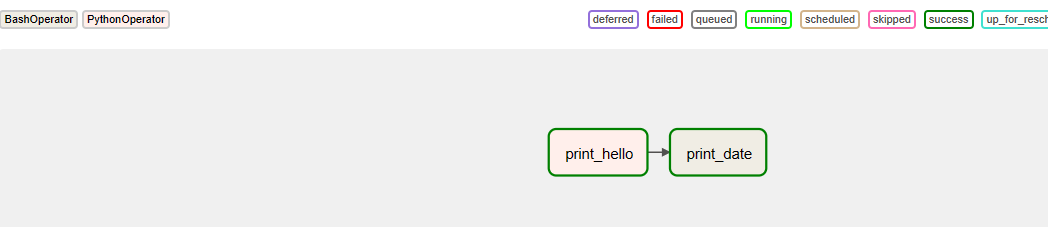

### Option2  
- Exercise1: Simple Pipeline - Hello World Airflow!
- รู้จักกับ Task Flow API ที่มาใหม่ใน Airflow 2.0
- เป็นวิธีการเขียน DAG แบบใหม่ ที่อ่านง่าย และทันสมัยขึ้น เหมาะสำหรับโค้ดที่เป็น `PythonOperator` ทั้งหมด
- ศึกษา tutorial ฉบับเต็มได้ที่นี่ https://airflow.apache.org/docs/apache-airflow/stable/tutorial_taskflow_api.html

In [ ]:
# Task Flow API

import datetime

from airflow.decorators import dag, task
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}


@task()
def print_hello():
    """
    Print Hello World!
    """
    print("Hello World!")


@task()
def print_date():
    """
    Print current date
    ref: https://www.w3schools.com/python/python_datetime.asp
    """
    print(datetime.datetime.now())


@dag(default_args=default_args,
     schedule_interval=None,
     start_date=days_ago(1),  #เริ่มเมื่อวาน แปลว่าทำงานได้เลย
     tags=['exercise'])

#task dependencies
def exercise1_taskflow_dag():

    t1 = print_hello()
    t2 = print_date()

    t1 >> t2


exercise1_dag = exercise1_taskflow_dag()


#### Output
t1 แสดง "Hello world"  
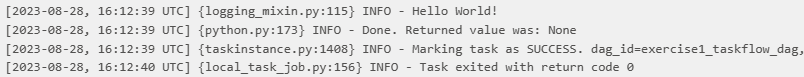  
t2 แสดง `Current datetime`  
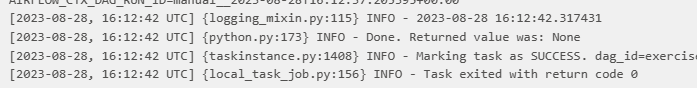

#### Task dependencies  
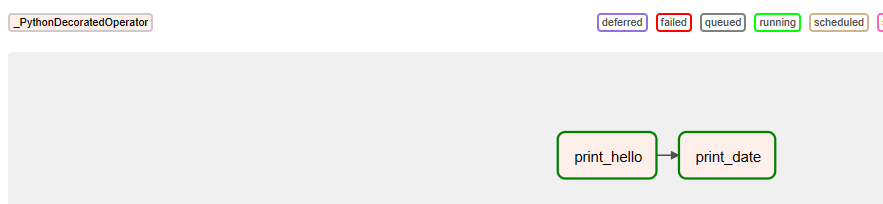

## Exercise 2

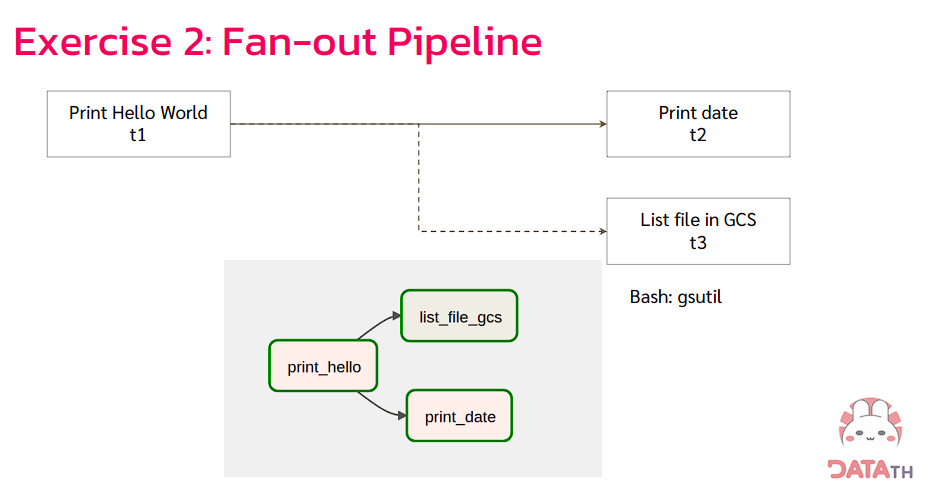

 ### Exercise 2: Fan-out Pipeline  
- ใน exercise นี้จะได้รู้จักกับการแยก pipeline ออกเพื่อให้ทำงานแบบ parallel พร้อมกันได้

### Option 1  
- ทดลองใช้คำสั่ง gsutil จาก BashOperator


In [ ]:
import datetime

from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}


def my_function(something: str):
    print(something)


with DAG(
    "exercise2_fan_out_dag",
    start_date=days_ago(1),
    schedule_interval=None,
    tags=["exercise"]
) as dag:


    t1 = PythonOperator(
        task_id="print_hello",
        python_callable=my_function,
        op_kwargs={"something": "Hello World!"},
    )

    t2 = BashOperator(
        task_id="print_date",
        bash_command="echo $(date)",
    )

    #TODO: ใส่ task t3 สำหรับ list ไฟล์ใน GCS bucket ที่เป็น DAGs folder
    #hint: ใช้ BashOperator ร่วมกับ command gsutil
    t3 = BashOperator(
        task_id="list_file_gcs",
        bash_command="gsutil ls gs://us-central1-demo-35ddcb16-bucket",
    )



    # TODO: ใส่ task dependencies ที่ทำให้รัน t3 พร้อมกับ t2 ได้

    t1 >> [t2,t3]

#### Output  
- ส่วน Hello world และ date จะเหมือนกับ Exercise 1
- t3 จะแสดงผล ลิสไฟล์ที่อยู่ใน gcs หรือ storageที่เก็บไฟล์ของAirflow  
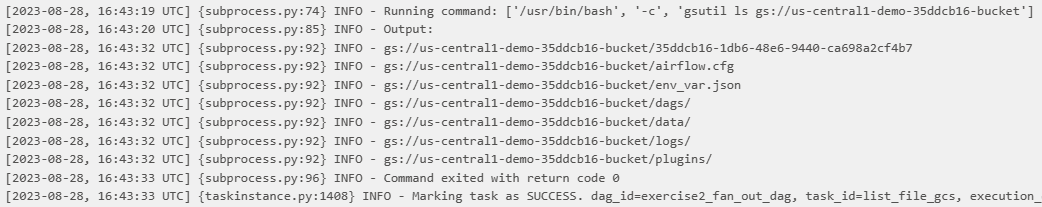

#### Task dependencies  
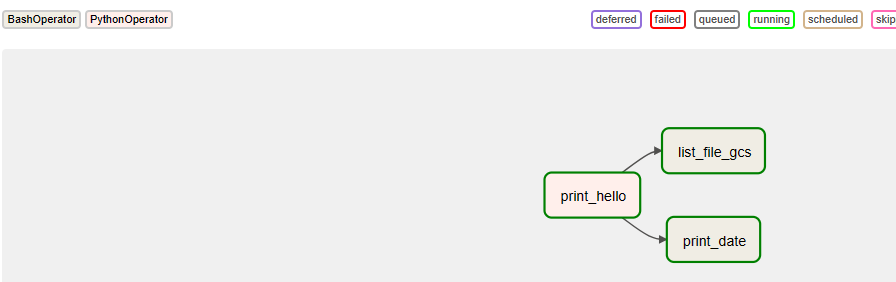

### Option 2  
- เอา Exercise 1 option2 มาทำfan-out คล้ายๆ Exercise 2 option1

In [ ]:
# Task Flow API
import datetime

from airflow.decorators import dag, task
from airflow.utils.dates import days_ago
from airflow.operators.bash import BashOperator

default_args = {
    'owner': 'datath',
}

@task()
def print_hello():
    """
    Print Hello World!
    """
    print("Hello World!")


@task()
def print_date():
    """
    Print current date
    ref: https://www.w3schools.com/python/python_datetime.asp
    """
    print(datetime.datetime.now())

@dag(default_args=default_args,
     schedule_interval=None,
     start_date=days_ago(1),
     tags=['exercise'])


def exercise2_taskflow_dag():

    t1 = print_hello()
    t2 = print_date()
    t3 = BashOperator(
        task_id="list_file_gcs",
        bash_command="gsutil ls gs://us-central1-demo-35ddcb16-bucket",
    )

    # TODO: สร้าง task dependencies ที่นี่
    t1 >> [t2,t3]


exercise2_dag = exercise2_taskflow_dag()


#### Output  
เหมือนกันกับ Exercise 2 option1

## Exercise 3

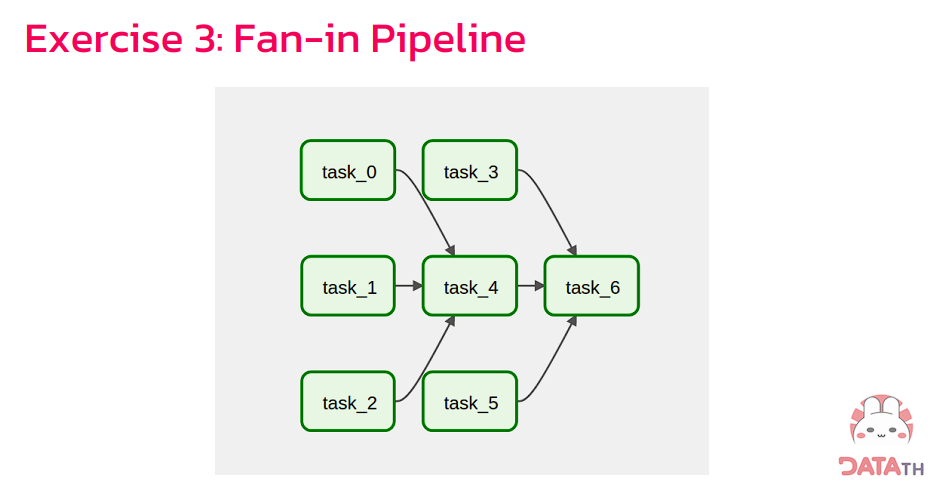

### Exercise3: Fan-in Pipeline
- ใน exercise นี้จะได้รู้จักการเขียน task ใน pipeline ขั้นตอนเยอะขึ้น
- ใช้ DummyOperator เป็น task จำลอง

In [ ]:
from airflow.models import DAG
from airflow.operators.dummy import DummyOperator
from airflow.utils.dates import days_ago


with DAG(
    "exercise3_fan_in_dag",
    start_date=days_ago(1),
    schedule_interval=None,
    tags=["exercise"]
) as dag:


    # TODO: สร้าง DummyOperator เพื่อสร้าง dependency ที่ซับซ้อน
    t0 = DummyOperator(task_id="task_0")
    t1 = DummyOperator(task_id="task_1")
    t2 = DummyOperator(task_id="task_2")
    t3 = DummyOperator(task_id="task_3")
    t4 = DummyOperator(task_id="task_4")
    t5 = DummyOperator(task_id="task_5")
    t6 = DummyOperator(task_id="task_6")

    [t0,t1,t2] >> t4
    [t3,t4,t5] >> t6

    #หรือจะใช้ loop

    #t= [DummyOperator(task_id=f"task_{i}") for i in range(7)]
    # [t[0],t[1],t[2]] >> t[4]
    # [t[3],t[4],t[5]] >> t[6]



#### Task dependencies  
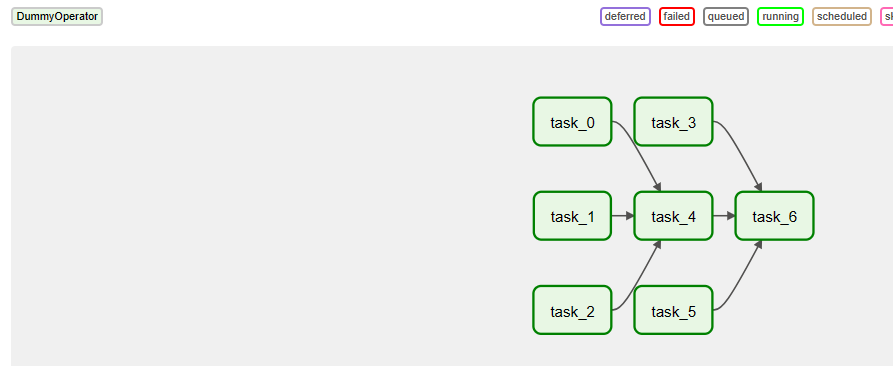

## Exercise 4

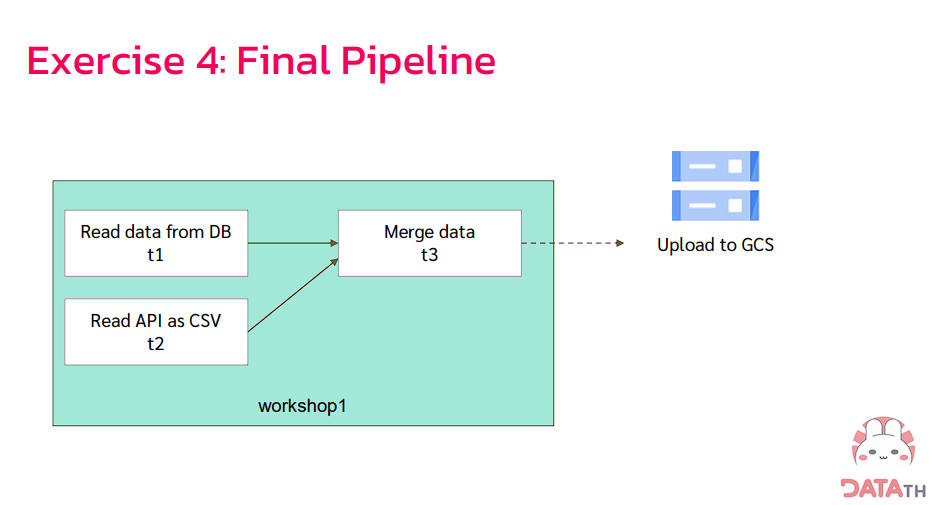

### ก่อนจะเริ่ม
เราจะมาสร้าง Connection ใน Airflow กันก่อน
ในที่นี้ เราสร้าง Mysql connection เพื่อที่จะดึงข้อมูลจาก Database ได้  
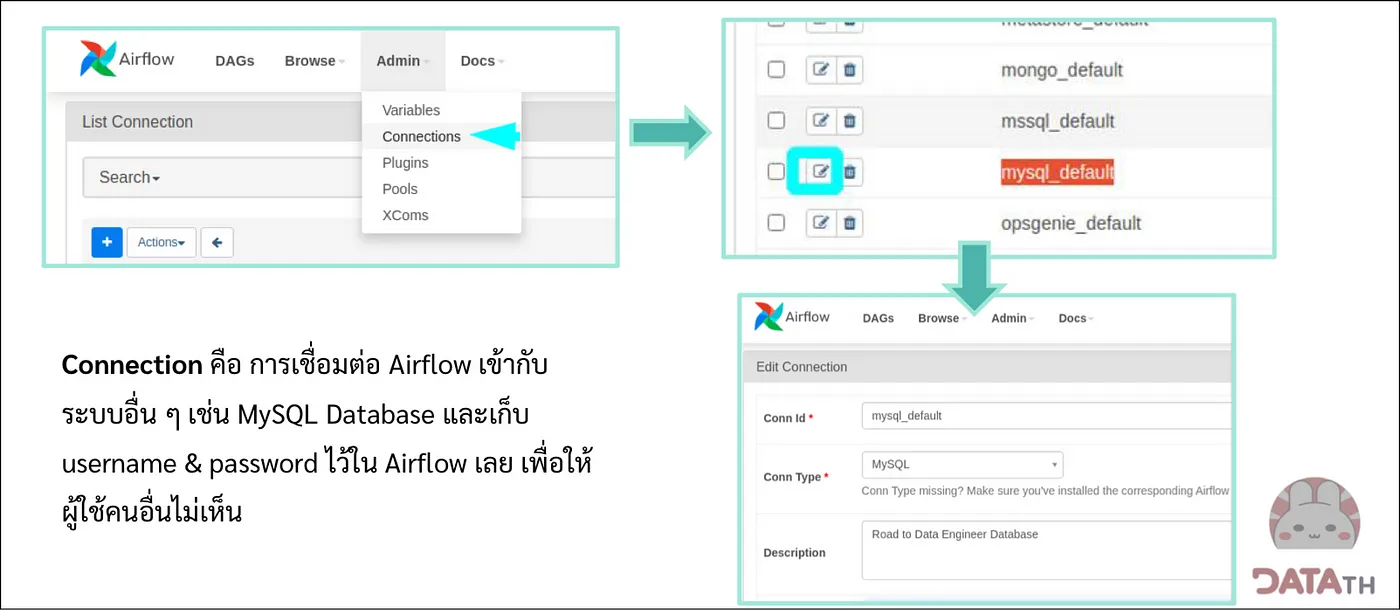

รายละเอียดเพิ่มเติมเกี่ยวกับ Mysql connection https://airflow.apache.org/docs/apache-airflow-providers-mysql/stable/connections/mysql.html

In [ ]:
from airflow.models import DAG

from airflow.operators.python import PythonOperator
from airflow.providers.mysql.hooks.mysql import MySqlHook #provider ของ airflow
# ไม่ใช้ operator เพราะว่า ไม่สามารถ get data จาก dbได้

from airflow.utils.dates import days_ago
import pandas as pd
import requests

MYSQL_CONNECTION = "mysql_default"   # ชื่อของ connection ใน Airflow ที่เซ็ตเอาไว้
CONVERSION_RATE_URL = "https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate"

# path ที่จะใช้
mysql_output_path = "/home/airflow/gcs/data/audible_data_merged.csv"
conversion_rate_output_path = "/home/airflow/gcs/data/conversion_rate.csv"
final_output_path = "/home/airflow/gcs/data/output.csv"


def get_data_from_mysql(transaction_path): # รับ transaction_path มาจาก task ที่เรียกใช้

    # เรียกใช้ MySqlHook เพื่อต่อไปยัง MySQL จาก connection ที่สร้างไว้ใน Airflow
    mysqlserver = MySqlHook(MYSQL_CONNECTION)

    # Query จาก database โดยใช้ Hook ที่สร้าง ผลลัพธ์ได้ pandas DataFrame
    audible_data = mysqlserver.get_pandas_df(sql="SELECT * FROM audible_data")
    audible_transaction = mysqlserver.get_pandas_df(sql="SELECT * FROM audible_transaction")

    # Merge data จาก 2 DataFrame เหมือนใน workshop1
    df = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

    # Save ไฟล์ CSV ไปที่ transaction_path ("/home/airflow/gcs/data/audible_data_merged.csv")
    # จะไปอยู่ที่ GCS โดยอัตโนมัติ
    df.to_csv(transaction_path, index=False)
    print(f"Output to {transaction_path}")


def get_conversion_rate(conversion_rate_path):
    r = requests.get(CONVERSION_RATE_URL)
    result_conversion_rate = r.json()
    df = pd.DataFrame(result_conversion_rate)

    # เปลี่ยนจาก index ที่เป็น date ให้เป็น column ชื่อ date แทน แล้วเซฟไฟล์ CSV
    df = df.reset_index().rename(columns={"index": "date"})
    df.to_csv(conversion_rate_path, index=False)
    print(f"Output to {conversion_rate_path}")


def merge_data(transaction_path, conversion_rate_path, output_path):
    # อ่านจากไฟล์ สังเกตว่าใช้ path จากที่รับ parameter มา
    transaction = pd.read_csv(transaction_path)
    conversion_rate = pd.read_csv(conversion_rate_path)

    transaction['date'] = transaction['timestamp']
    transaction['date'] = pd.to_datetime(transaction['date']).dt.date
    conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date

    # merge 2 DataFrame
    final_df = transaction.merge(conversion_rate, how="left", left_on="date", right_on="date")

    # แปลงราคา โดยเอาเครื่องหมาย $ ออก และแปลงให้เป็น float
    final_df["Price"] = final_df.apply(lambda x: x["Price"].replace("$",""), axis=1)
    final_df["Price"] = final_df["Price"].astype(float)

    final_df["THBPrice"] = final_df["Price"] * final_df["conversion_rate"]
    final_df = final_df.drop(["date", "book_id"], axis=1)

    # save ไฟล์ CSV
    final_df.to_csv(output_path, index=False)
    print(f"Output to {output_path}")
    print("== End of Workshop 4 ʕ•́ᴥ•̀ʔっ♡ ==")


with DAG(
    "exercise4_final_dag",
    start_date=days_ago(1),
    schedule_interval="@once",
    tags=["workshop"]
) as dag:

    # TODO: สร้าง t1, t2, t3 ที่ใช้ PythonOperator
    # และสร้าง task dependencies
    t1 = PythonOperator(
        task_id="get_data_from_mysql",
        python_callable=get_data_from_mysql,
        op_kwargs={"transaction_path": mysql_output_path},
    )
    #op_kwargs option keyword argument my_function(something: str). someting = "Hello World!"
    t2 = PythonOperator(
        task_id="get_conversion_rate",
        python_callable=get_conversion_rate,
        op_kwargs={"conversion_rate_path": conversion_rate_output_path},
    )
    t3 = PythonOperator(
        task_id="merge_data",
        python_callable=merge_data,
        op_kwargs={"conversion_rate_path": conversion_rate_output_path ,
                    "transaction_path" : mysql_output_path ,
                    "output_path" : final_output_path},
    )

    [t1,t2] >> t3

In [ ]:
# อีกแบบนึง แบบใช้ SQLalchemy ซึ่งPandas support

from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.providers.mysql.hooks.mysql import MySqlHook #provider ของ airflow
# ไม่ใช่ operator เพราะว่า ไม่สามารถ get data จาก dbได้
from airflow.utils.dates import days_ago
import pandas as pd
import requests
from sqlalchemy import create_engine


MYSQL_CONNECTION = "mysql_default"   # ชื่อของ connection ใน Airflow ที่เซ็ตเอาไว้
CONVERSION_RATE_URL = "https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate"

# path ที่จะใช้
mysql_output_path = "/home/airflow/gcs/data/audible_data_merged.csv"
conversion_rate_output_path = "/home/airflow/gcs/data/conversion_rate.csv"
final_output_path = "/home/airflow/gcs/data/output.csv"


def get_data_from_mysql(transaction_path):
    # รับ transaction_path มาจาก task ที่เรียกใช้

    mysqlserver = MySqlHook(MYSQL_CONNECTION)   # เรียกใช้ MySqlHook เพื่อต่อไปยัง MySQL จาก connection ที่สร้างไว้ใน Airflow
    mysql_connection = mysqlserver.get_sqlalchemy_engine() #ดึงข้อมูลโดยใช้ SqlAlchemy และ pandasเปลี่ยนเป็นdataframe
    with mysql_connection.begin() as mysqlH:
        audible_data = pd.read_sql(sql="SELECT * FROM audible_data", con=mysqlH)
        audible_transaction = pd.read_sql(sql="SELECT * FROM audible_transaction", con=mysqlH)


    # Merge data จาก 2 DataFrame เหมือนใน workshop1
    df = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

    # Save ไฟล์ CSV ไปที่ transaction_path ("/home/airflow/gcs/data/audible_data_merged.csv")
    # จะไปอยู่ที่ GCS โดยอัตโนมัติ
    df.to_csv(transaction_path, index=False)
    print(f"Output to {transaction_path}")


def get_conversion_rate(conversion_rate_path):
    r = requests.get(CONVERSION_RATE_URL)
    result_conversion_rate = r.json()
    df = pd.DataFrame(result_conversion_rate)

    # เปลี่ยนจาก index ที่เป็น date ให้เป็น column ชื่อ date แทน แล้วเซฟไฟล์ CSV
    df = df.reset_index().rename(columns={"index": "date"})
    df.to_csv(conversion_rate_path, index=False)
    print(f"Output to {conversion_rate_path}")


def merge_data(transaction_path, conversion_rate_path, output_path):
    # อ่านจากไฟล์ สังเกตว่าใช้ path จากที่รับ parameter มา
    transaction = pd.read_csv(transaction_path)
    conversion_rate = pd.read_csv(conversion_rate_path)

    transaction['date'] = transaction['timestamp']
    transaction['date'] = pd.to_datetime(transaction['date']).dt.date
    conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date

    # merge 2 DataFrame
    final_df = transaction.merge(conversion_rate, how="left", left_on="date", right_on="date")

    # แปลงราคา โดยเอาเครื่องหมาย $ ออก และแปลงให้เป็น float
    final_df["Price"] = final_df.apply(lambda x: x["Price"].replace("$",""), axis=1)
    final_df["Price"] = final_df["Price"].astype(float)

    final_df["THBPrice"] = final_df["Price"] * final_df["conversion_rate"]
    final_df = final_df.drop(["date", "book_id"], axis=1)

    # save ไฟล์ CSV
    final_df.to_csv(output_path, index=False)
    print(f"Output to {output_path}")
    print("== End of Workshop 4 ʕ•́ᴥ•̀ʔっ♡ ==")


with DAG(
    "WS4_final_dag",
    start_date=days_ago(1),
    schedule_interval="@once",
    tags=["workshop"]
) as dag:

    # TODO: สร้าง t1, t2, t3 ที่ใช้ PythonOperator
    # และสร้าง task dependencies
    t1 = PythonOperator(
        task_id="get_data_from_mysql",
        python_callable=get_data_from_mysql,
        op_kwargs={"transaction_path": mysql_output_path},
    )
    #op_kwargs option keyword argument my_function(something: str). someting = "Hello World!"
    t2 = PythonOperator(
        task_id="get_conversion_rate",
        python_callable=get_conversion_rate,
        op_kwargs={"conversion_rate_path": conversion_rate_output_path},
    )
    t3 = PythonOperator(
        task_id="merge_data",
        python_callable=merge_data,
        op_kwargs={"conversion_rate_path": conversion_rate_output_path ,
                    "transaction_path" : mysql_output_path ,
                    "output_path" : final_output_path},
    )

    [t1,t2] >> t3




### Task dependencies  
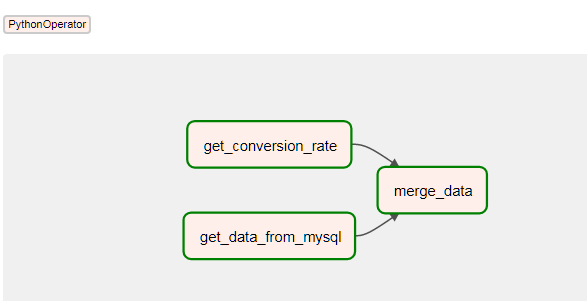

### Output  
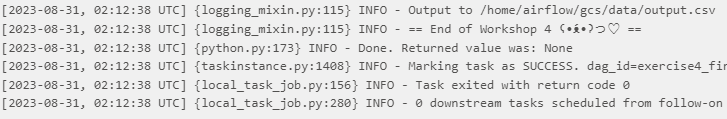
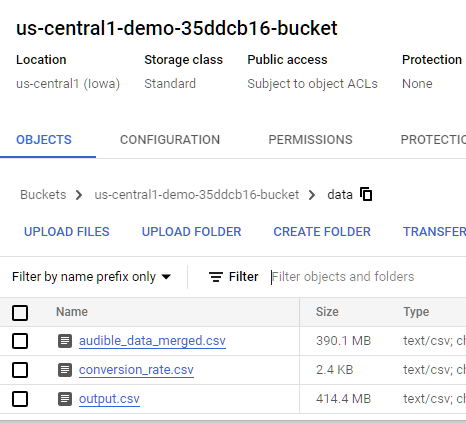

-----------------------
## จบ Workshop 4